# Introduction to Visualizaiton Libraries

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shinchu/dataviz-notebooks/blob/main/week_2/intro-to-matplotlib.ipynb)

## Pythonの主要な可視化ライブラリ

* [matplotlib](https://matplotlib.org/): 最も広く使われている。かなり細かいところまで調整できるので、論文に載せる図はこれで作ることが多い。
* [seaborn](https://seaborn.pydata.org/): matplotlibのラッパー。matplotlibのデザインをデフォルトでいい感じにしてくれる。細かい調整は内部のmatplotlibにアクセスして行う。
* [plotly](https://plotly.com/python/): インタラクティブな図を作ることができる。さっと使う分にはとても便利。
* [altair](https://altair-viz.github.io/): 宣言型統計可視化ライブラリ。データと視覚記号の関係を宣言することで図を作ることができる。
* ...

※ 宣言型（declarative）: 何をするか（what）を書く

※ 命令型（imperetive）: どうするか（how）を書く

本講義では、matplotlibとaltairを主に扱います。手軽にインタラクティブな図を作れるplotlyも少し紹介します。

# Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

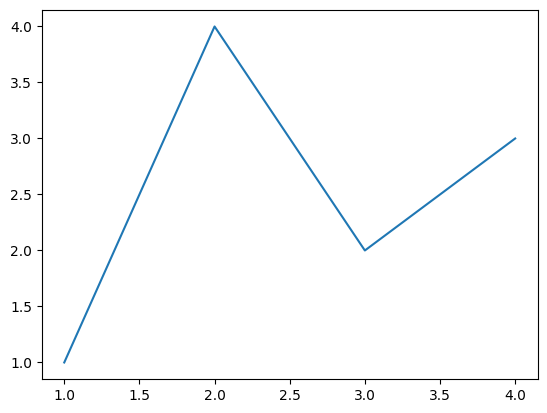

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

matplotlibでは，グラフの要素ごとにさまざまな指定をすることができる．それぞれの要素の名前は下図を参考．


<img src= "img/matplotlib.png" width = "400"> 

基本的には，Figureという枠の中に，Axesを配置する形です．グラフの作成では，axにグラフが書かれます．一つのFigureの中に複数のAxesを配置することができます．例えば，以下の図のように，3つのaxを表示できます．<br>
Figure.add_subplot(nrows, ncols, index)をつかいます．nrows，ncols，indexは位置と大きさを決める変数です。Figureを、縦nrows分割・横ncols分割した上で，index番目の位置に配置されたAxesが表示されます。グラフを1つしか作らないときは(1, 1, 1)でよいです．

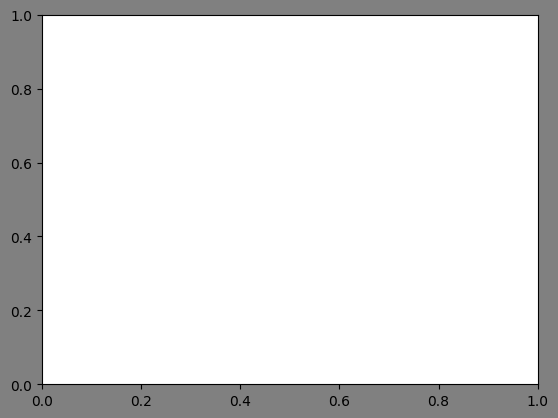

In [3]:
fig = plt.figure(facecolor='gray')
ax1 = fig.add_subplot(1, 1, 1)  

分割の例を実行してみましょう．

Text(0.5, 0.98, 'plt.subplots()')

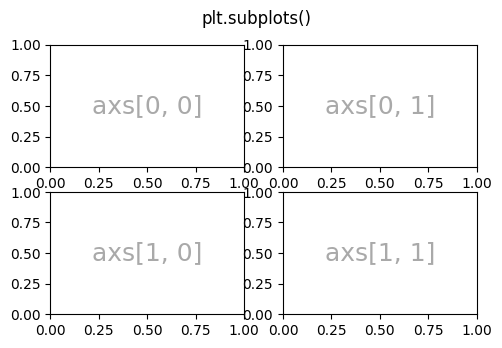

In [5]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5))
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

様々な形を一つのFigureに同居させることもできます．

In [ ]:
fig = plt.figure(facecolor='gray')
ax1 = fig.add_subplot(2, 2, 1)  # 2行2列の1番目
ax2 = fig.add_subplot(2, 3, 4)  # 2行3列の4番目
ax3 = fig.add_subplot(1, 3, 3)  # 1行3列の3番目

## 色々な図を描いてみましょう

In [ ]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

pyplotスタイル

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7))
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

In [ ]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2)
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### matplotlibを読み込みましょう

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 300)

### データ読み込み

* Pandasデータフレームを利用してデータの読み込みを行う
* データセット、URL、直接入力などでデータを与えることができる
* この時、データフレームの形が[Tidy data](http://vita.had.co.nz/papers/tidy-data.html)であることが望ましい（Tidy dataになっていない時は事前に形を整える）
    * Tidy dataでは、各変数が列、各観測値が行、各観測単位がテーブルとなっている
    * このような形を維持することでデータの操作、モデル化、視覚化が容易となる

#### データセットから読み込む

In [ ]:
from vega_datasets import data
cars = data.cars()
cars.head()

#### 直接入力
ここでは、都市と月の平均降雨量（`precip`），人口(`pop`)を含む簡単なデータフレームを扱う。

In [ ]:
df = pd.DataFrame({
    'city': ['city1', 'city2', 'city3', 'city4'],
    'pop': [4, 8, 12, 15],
    'precip': [2.68, 0.87, 5.31, 3.94]
})

df

## さまざまなグラフ
データフレームの後ろに.plotとつけることでグラフを簡単に作成できます．kind で可視化の種類を選択できます．
<br>
### 縦棒グラフ

In [ ]:
df.plot(x='city', y='precip', kind="bar")

### 横棒グラフ

In [ ]:
df.plot(x='city', y='precip', kind="barh")

### 折れ線グラフ

In [ ]:
df.plot(x='city', y='precip', kind="line")

### 散布図

In [ ]:
df.plot(x='pop', y='precip', kind="scatter")

### 円グラフ

In [ ]:
df.plot(y='pop', kind="pie")

## 散布図と折れ線グラフを用いて視覚化を変えていきましょう．

In [ ]:
cars

### 散布図

In [ ]:
cars.plot(x='Year', y='Miles_per_Gallon', kind="scatter", marker="o", color = "green")

【演習】markerにはさまざまな形を指定できます．色(color)も変更できます．
赤字で * を使ってグラフを書いてみましょう．

In [ ]:
# Your code goes here

### 折れ線グラフ

サンプルのデータセットを作成します．

In [ ]:
smpdf = pd.DataFrame({
    'num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'fib': [1, 1, 2, 4, 5, 8, 13, 21, 34, 55],
    'sqr': [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
})
smpdf

折れ線グラフで書いてみましょう．

In [ ]:
smpdf.plot(x='num', y='sqr', kind="line", marker="o", color = "green")

複数のデータを提示することもできます．

In [ ]:
smpdf.plot(x='num', y=['sqr','fib'], kind="line", marker="s", linestyle = "--", color = ["green", "red"])

このままでは，ライン等の提示を自由に変えることができません．別の方法を使って可視化してみましょう．ここでは，Axisにグラフを渡しています．

In [ ]:
fig = plt.figure(facecolor="white")
ax = fig.add_subplot(111, xlabel="xlabel", ylabel='ylabel') 

# 　ax.plot(x軸のデータ, y軸のデータ,  marker="hogehoge" マーカーの形, color="hogehoge" 色, label="hogehoge"ラベルの名前 , linestyle = "hogehoge"線のスタイル, linewidth=hogehoge 線の太さ)
ax.plot(smpdf['num'], smpdf['fib'],  marker="o", color="blue", label="blue", linestyle = "--", linewidth=0.5)
ax.plot(smpdf['num'], smpdf['sqr'],  marker="o", color="green", label="green", linestyle = "-.", linewidth=1)

ax.legend()

【演習】<br>
・xlabel, ylabelを好きな文字に変更してみましょう<br>
・線の色と太さ，マーカーの形状を変更してみましょう．

In [ ]:
# Your code goes here

## 参考
公式ドキュメントの他に，参考になりそうなまとめ記事も掲載します．
* https://matplotlib.org/stable/plot_types/index.html
* https://qiita.com/nkay/items/d1eb91e33b9d6469ef51